

## The Data 
Kaggle is a platform that allows users to share data sets they have constructed separately. The content of Kaggle is not regulated meaning anyone can post, and they take no responsibility regarding whether the data is accurate. The data we obtained from Kaggle was reliable as it trained the convolutional neural network correctly as well as offering a large volume of data, we did also spot check the categorisation of some images but of course it is unreasonable to check them all. One issue with the data collected was that the images were all taken with a light shining from one side meaning the images were less varied. The process of data augmentation carried out before we received the data helped to add variety by making small changes to pre-existing data. The first data set titled ‘Sign Language MNIST’ has a training and test set. We further split the training set into a train and validation set to save the testing set for evaluation to avoid overfitting.  Each set has a corresponding number from 0 to 25 relating to a letter A-Z in a one-to-one mapping. The letters, J=9 and Z=25 could not be included in the model as they require motion and therefore there is no case for them. 
The data was given in the form of Microsoft Excel spreadsheets consisting of a table with corresponding number labels and then the 748 pixels associated with that label. The data set has taken advantage of data augmentation. The images were cropped, grey-scaled and resized over fifty times. In order to modify and expand the data, filters were used with varied pixilation and 15% brightness contrast. These changes to the data for each sign mean that the model is more inclusive to various skin tones and sizes of hands making the model more accessible for people to use. After the model was trained using the first data set, it was tested using images from the second Kaggle data set and of our own hands showing the alphabet signs. Grayscale filters were used on the data sets, as using RGB filters return a matrix due to there being three dimensions and not single values. We also don’t think that colour is too important when determining a hand signal. The second Kaggle set, ‘sign language for alphabets’, consists of 1500 images for each class to train from. This data set was initially used to train the model however it presented us with errors due to the image inputs which caused the dataset to become redundant. Possible explanations for these errors are issues with the image resizing when compressed or the lighting in which the images were taken. 



## Project Objectives
## Objective 1
•	Pre-process and check sign language image data, this involved reshaping and normalising. Followed by checking some images and the distributions within each of the sets.
## Objective 2
•	Build and train a convolutional neural network which will recognise the input image sign and return the associated letter.
## Objective 3
•	Use the model to categorise our own images.


### Specific Objective(s)

This project aims to create a visual recognition algorithm that can identify each letter in the sign language alphabet and return the letters associated with each sign connected as a word. In the model generated we will not be able to return the letters J and Z due to them requiring motion and not a stationary sign. Implementation of this model into computer visual platforms will create a communication method for the deaf community as anyone can input unseen images into the model and the correct word will be returned. 

The pre-processing will reshape and compress the input images. Normalising the data is important as it enables different data sets with different ranges to be used. The training data went up to a pixel value of 255 so we divided the data by 255 to normalise the values to between 0 and 1. The pre-processed data will then be inputted into the model. The model will look initially look for basic features including edges and curves of the hands and then identify more specific features of each sign through a series of convolutional layers. It will be trained using the ‘Sign Language MNIST’ data in order to return the letter associated with the sign. Using the same data set we will use the testing set to test and validate the model before going on to input our own images and testing the model with them.

### Processing Modules and Algorithms

_list and describe the most significant computational components of your system_

* _Training a CNN using the Tensorflow module, in which we have chosen to use two convolutional layers and one dense layer_
* _Loading our own image data using the OS library and processing the image into an image matrix that is greyscale using the cv2 library
* _Categorising our own sign language images with our trained nerual network, and outputting a word using model.predict from tensorflow and various for loops_

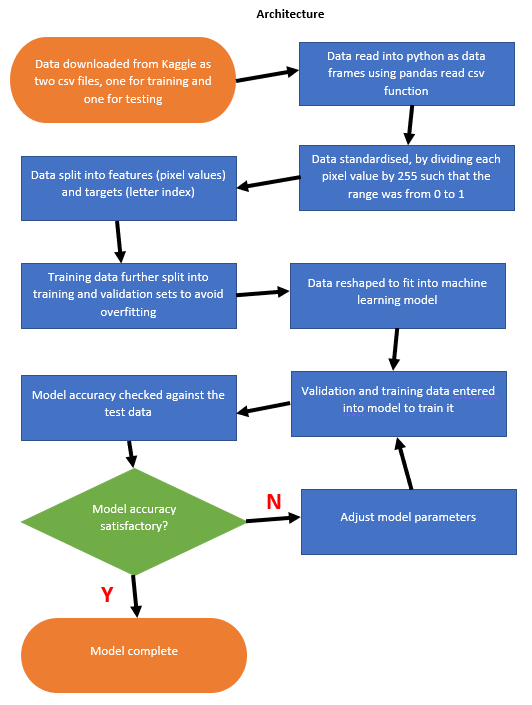

#### _Brief Explanation of following code cell_

In here we import the modules that we need to load and alter the data, and to build and train the CNN.

In [27]:
# Import many programs
import numpy as np 
import pandas as pd
import tensorflow as tf 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D , MaxPooling2D , Flatten , Dropout
import os 
import cv2

#### _Brief Explanation of following code cell_

In here we read in the data and standardize it. The standardization means that the CNN's training will be smoother.

In [28]:
# Read in the data

train_df = pd.read_csv("sign_mnist_train.csv")

test_df = pd.read_csv("sign_mnist_test.csv")


# Standardisation, as the values range from 0 to 255 to make them all between 0 and 1 as this is best for ML model

train_df.iloc[:,1:] /= 255
test_df.iloc[:,1:] /= 255

#### _Brief Explanation of following code cell_

In here we further split the data into target vectors (y_train and y_test) and feature data frames (x_train and x_test). Then the training set is split further into training and validation sets, meaning the test set can be saved for testing only, to avoid overfitting.

In [29]:
# splitting features and target column
x_train = train_df.iloc[:,1:]
y_train = train_df.iloc[:,0]
x_test = test_df.iloc[:,1:]
y_test = test_df.iloc[:,0]

# further splitting training set into validation and training set so as to avoid overfitting
x_train,x_validate,y_train,y_validate = train_test_split(x_train,y_train,test_size = 0.2)

#### _Brief Explanation of following code cell_

In here we will check/show the images, we ran this lots of times looking at different ones. We learned that the data set was quite homogenous.

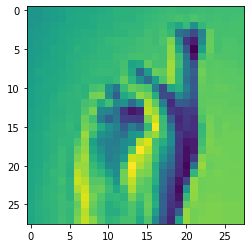

In [30]:
# Checking out an image 
plt.imshow(np.array(x_test[313:314]).reshape(28,28))

#### _Brief Explanation of following code cell_

In here we are checking the distribution of the classes in the train, test and validation. We want them to be even so that the model doesn't become bias towards classifying images as more common letters to increase it's accuracy.  

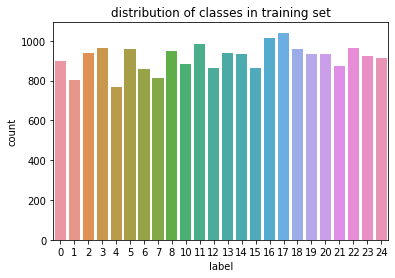

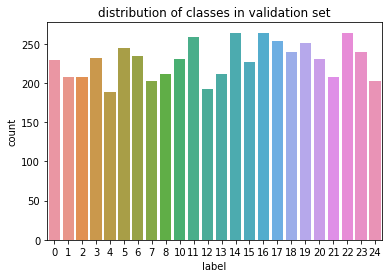

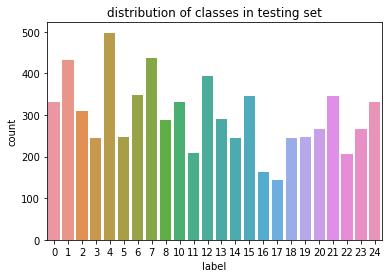

In [31]:
# Checking the distriubtion of classes in each set to avoid the model prioritising one class

sns.countplot(y_train)
plt.title('distribution of classes in training set')
plt.show()
sns.countplot(y_validate)
plt.title('distribution of classes in validation set')
plt.show()
sns.countplot(y_test)
plt.title('distribution of classes in testing set')
plt.show()

#### _Comment on previous cell output_

Here was saw that the validation and training sets are both very evenly distributed, this is the mos timportant thing as they are used for training the data. The test set however is not so even, this is not as important, but is something we perhaps could have rectified to imporve our evaluation of the model.

#### _Brief Explanation of following code cell_

In here we re-shape the inputs to the model, so they are the correct size.

In [32]:
x_train = x_train.values.reshape(-1,28,28,1)
x_validate = x_validate.values.reshape(-1,28,28,1)
x_test = x_test.values.reshape(-1,28,28,1)

#### _Brief Explanation of following code cell_

In here we specify the convolutional neural network's layers. Then we train the model. These two things are in the same cell because otherwise when we want to adjust the parameters jupyter remembers the training from the previous run through, and the accuracy starts from where it was trained to previously. This way the model is re-specified each time and it starts from the begining, and we can find the true results of our adjusted parameters.

In [33]:
model = Sequential()

model.add( Conv2D( 64,kernel_size=(3,3),input_shape = (28,28,1), activation = "relu"))
model.add( MaxPooling2D(pool_size=(2,2)))
model.add( Dropout(0.4))

model.add( Conv2D( 64,kernel_size=(3,3), activation = "relu"))
model.add( MaxPooling2D(pool_size=(2,2)))
model.add( Dropout(0.3))

model.add(Flatten())
model.add(Dense(100, activation = "relu"))
model.add( Dropout(0.2))

model.add(Dense(25, activation= "softmax"))

model.compile(optimizer= "adam", loss= "sparse_categorical_crossentropy", metrics= ["accuracy"])
model.summary()

model.fit(x_train,y_train,
    batch_size=100,
    epochs=10,
    validation_data=(x_validate,y_validate))

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 13, 13, 64)        0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 11, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 1600)             

#### _Comment on previous cell output (optional)_

Here we can see the model being trained with 10 epochs. This is the number of times the entire sample is trained on. After each epoch the validation and trainng accuracy are reported. Batch size is the number of samples that are put through at once each time the network is evaluated and adjusted.

You can see we managed to achieve a validation accuracy of 100% and a training accuracy of 98.3%.

#### _Brief Explanation of following code cell_

In here we evaluate the model on the test set to see it's accuracy. This has to be done because even though the accuracy on the trainng and evaluation sets may be high, this can be due to overfitting.

In [34]:
score = model.evaluate(x_test,y_test)
print('Test loss: {:.4f}'.format(score[0]))
print('Test accuracy: {:.4f} %'.format(100*score[1]))

225/225 [==============================] - 2s 9ms/step - loss: 0.1934 - accuracy: 0.9439
Test loss: 0.1934
Test accuracy: 94.3949 %


#### _Comment on previous cell output (optional)_

As you can see we obtained an accuracy of 94.4%

#### _Brief Explanation of following code cell_

in the following cell we define a function that predicts the letter of a sign languae image

In [35]:
# New function that will output the predicted letter when the imput is of the same type as x_test[5:6]

def predict_letter(arr):
    index = np.argmax(model.predict(arr))
    all_letters = "ABCDEFGHIJKLMNOPQRSTUVWXYZ"
    return(all_letters[index])




# Importing Our Own Images


In [36]:
training_data = []
IMG_SIZE = 28
## IMAGE DIMESNIONS RE-DEFINED
X=[]
y=[]
####### DEFINING THE DIRECTORY WHERE TO FIND THE IMAGES####
DATAIR="C:/Users/Ahmed/Desktop/A3 materials/HandSignsOurPics"
### CREATING A LIST OF THE LABELS OF OUR IMAGES WITH J AND Z BEING OMITTED ####
### J AND Z OMITTED AS THEY ARE MOTIONS THAT CANNOT BE CAPTURED ACCURATELY BY IMAGES ALONE#
CATGORIES=["A", "B",'C','D','E','F','G','H','I','K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y']



### TRY AND EXCEPT USED TO BY-PASS CORRUPTED DATA




## 2ND LOOP ALSO DIVIDES EACH PIXEL BY 250 
## DIVIDNG EACH PIXEL BY 250 IS BECAUSE MAX VALUE OF ANY PIXEL IS 250
## THEREFORE DIVIDING BY 250 TO NORMALIZE DATA IN RNAGE 0-1
### DONE IN ORDER FOR THE CNN TO WORK 

def create_training_data():
    ### FIRST FOR LOOP IS LOOP THAT LOOPS OVER EACH FILE LABELED WITH ITS CORRESPONDING LETTER IN THE DIRECTORY 
    for category in CATGORIES:
        path=os.path.join(DATAIR,category)
        class_num = CATGORIES.index(category)
        ### SECOND FOR LOOP  LOOPS OVER EACH IMAGE IN THE CORRESPONDING LABLLED FILE ASSIGNING THE PATH TO 
        ## EACH TO EACH IMAGE AND CONVERTING IT TO GREY SCALE
        for img in os.listdir(path):
            ### TRY AND EXCEPT USED TO BY-PASS CORRUPTED DATA
            try:
                img_array=cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
                ## 2ND LOOP ALSO DIVIDES EACH PIXEL 
                ##BY 250 
                ## DIVIDNG EACH PIXEL BY 250 IS BECAUSE
                ##MAX VALUE OF ANY PIXEL IS 250
                ## THEREFORE DIVIDING BY 250 TO NORMALIZE DATA IN RANGE 0-1
                #img_array=img_array/250
                new_array = cv2.resize(img_array, (IMG_SIZE,IMG_SIZE))
                ## RE SIZE IMAGE TO A SQUARE IMAGEWITH
                ##DIMESNIONS IMG_SIZE BY iMG_SIZE
                training_data.append([new_array, class_num])
                ## APPENDS EACH IMAGES GREY SCALE MATRIX ARRAY TO ITS CORRESPONDING LABEL 
            except Exception as e:
                pass



#RUN THE FUNC
create_training_data()


## FOR LOOP THAT ASSIGNS EACH IMAGE ARRAY TO X AND THE LABEL TO Y
for features, label in training_data:
    X.append(features)
    y.append(label)     

## EACH INDEX OF X IS EQUAL TO ITS INDEX IN Y
## E.G IMAGE X[12]'S LABEL WILL BE Y[12] ETC
          

- Output of cell above is matrix X made of image arrays and Y their corresponding labels 
- The above cell imports our data using the os library and, reshapes/greyscales our image using the cv2 library


In [37]:

## Assigning each letter to its corresponding row in the matrix 
## Re shaping each pixture into the correct dimensons to be tested on our model
A=np.array(X[0]).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
B=np.array(X[2]).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
C=np.array(X[6]).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
D=np.array(X[8]).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
E=np.array(X[14]).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
F=np.array(X[16]).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
G=np.array(X[17]).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
H=np.array(X[18]).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
I=np.array(X[19]).reshape(-1, IMG_SIZE, IMG_SIZE, 1)

K=np.array(X[23]).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
L=np.array(X[25]).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
M=np.array(X[27]).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
N=np.array(X[30]).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
O=np.array(X[32]).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
P=np.array(X[35]).reshape(-1, IMG_SIZE, IMG_SIZE, 1)


Q=np.array(X[36]).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
R=np.array(X[38]).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
S=np.array(X[40]).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
T=np.array(X[41]).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
U=np.array(X[42]).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
V=np.array(X[44]).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
W=np.array(X[46]).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
X1=np.array(X[48]).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
Y=np.array(X[50]).reshape(-1, IMG_SIZE, IMG_SIZE, 1)


- OUTPUT OF ABOVE CELL IS A RANDOM SAMPLE OF EACH LETTER TAKEN BY EACH MEMBER OF THE A3 GROUP 
- SHAPED IN THE DIMENSIONS IT CAN BE RUN THROUGH THE CNN MODEL
- EACH MATRIX IS ASISGNED TO ITS CORRESPONDING LETTER 
- X1 LABELED AS SUCH TO AVOID CLASHING WITH ORIGNAL X MATRIX

In [38]:
## SHOWING WHICH LETTERS WERE CORRECTLY ASSIGNED AND WHICH WERE NOT 

print('A=',predict_letter(A))
print('B=',predict_letter(B))
print('C=',predict_letter(C))
print('D=',predict_letter(D))
print('E=',predict_letter(E))
print('F=',predict_letter(F))
print('G=',predict_letter(G))
print('H=',predict_letter(H))
print('I=',predict_letter(I))
#print(pre,dict_letter(J))
print('K=',predict_letter(K))
print('L=',predict_letter(L))
print('M=',predict_letter(M))
print('N=',predict_letter(N))
print('O=',predict_letter(O))
print('P=',predict_letter(P))
print('Q=',predict_letter(Q))
print('R=',predict_letter(R))
print('S=',predict_letter(S))
print('T=',predict_letter(T))
print('U=',predict_letter(U))
print('V=',predict_letter(V))
print('W=',predict_letter(W))
print('X=',predict_letter(X1))
print('Y=',predict_letter(Y))


A= N
B= B
C= L
D= Y
E= E
F= I
G= H
H= H
I= I
K= Q
L= L
M= C
N= S
O= F
P= P
Q= Q
R= M
S= S
T= T
U= U
V= V
W= W
X= P
Y= Y


ABOVE CELL SHOWS THE OUTPUT OF OUR RANDOM SAMPLE BEING TESTED ON THE MODEL 
IE B=B IS CORRECT, A=M IS A MISS CLASSIFCATION 

# Project Outcome 

_This section should describe the outcome of the project by means of both explanation of the results and by graphical visualisation in the form of graphs, charts or or other kinds of diagram_

_The section should begin with a general overview of the results and then have a section for each of the project objectives. For each of these objectives an explanation of more specific results relating to that objective shoud be given, followed by a section presenting some visualisation of the results obtained. (In the case where
the project had just one objective, you should still have a section describing
the results from a general perspective followed by a section that focuses on
the particular objective.)_

_The marks for this section will be divided into 10 marks for Explanation
and 10 marks for Visualisation. These marks will be awarded for the Project Outcome
section as a whole, not for each objective individually. Hence, you do not
have to pay equal attention to each. However, you are expected to have a
some explanation and visualisation for each. It is suggested you have
200-400 words explanation for each objective._

## Overview of Results
Overall, we are happy with our results. We achieved a test accuracy of 95.4%, which we think could have been even higher if we ran more epochs during training. The categorising of our own images was not the best; however, we think this would have been improved if we were able to make our pictures more like those in the training set. This suggests the model doesn’t generalise very well, which is something we discuss later.

## Objective 1

### Explanation of Results

_Pre-processing and checking the data. First loading the data in from csv files, these had already been split into testing and training data. We separated it further into a validation set as well. Then we split these each into target vectors y_train, y_test and y_validate, and feature data frames x_train, x_test and x_validate. The x_ data frames have width 784, which is one value per each pixel, as the images are 28x28. Our training set had height 21964, so 21964 images. The validation set had 5491 and the test set 7172. The target vectors y were all the same length as their corresponding feature frames, each value taking an integer 0-24 inclusive but not 9. This is only 24 integers because z and j are not included as they require motion to be communicated.

The pixel data was also normalised, by dividing each value by 255. This is because the greyscale range we had was 0-255, so ensuring that every pixel value was between 0 and 1. This can help the neural network with computation. It was not strictly necessary here because the data we used all came form the same source, however when we wanted to use our own images later on they were not the same range so normalising both improves consistency. 
_

### Visualisation
_The following bar charts show the distribution of each of our data sets. One can see the distributions are very even for the training and validation sets, but not so good for the testing set. This is the better way round to have it, however I think we might have potentially slightly wrongly calculated the accuracy with this test set being so uneven._

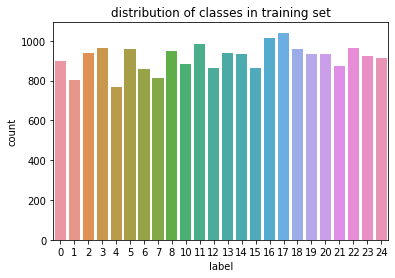

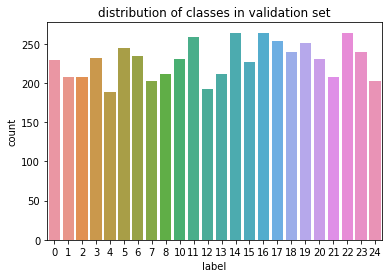

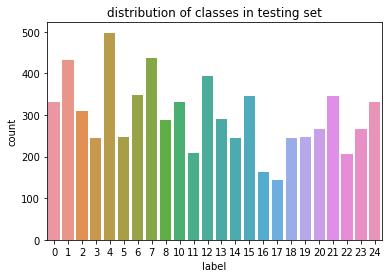

In [39]:
sns.countplot(y_train)
plt.title('distribution of classes in training set')
plt.show()
sns.countplot(y_validate)
plt.title('distribution of classes in validation set')
plt.show()
sns.countplot(y_test)
plt.title('distribution of classes in testing set')
plt.show()

## Objective 2 _(if present)_
### Explanation of Results

The initial sequential function was used to stack the linear layers that were added to the model using the ‘model.add’ function. We needed to compile the layers to generate the convolutional neural network. The ‘conv2D’ layer generated a convolutional layer which consists of the ‘conv2D’ parameter which prescribes how many filters the layers will pass through, the kernel size, input shape and activation. The kernel size specifies the size of the filter we passed over the input image, we used a 3 by 3 filter in the first two layers. The ‘ReLU ‘activation function is a linear function which outputted the input directly if it was positive and if it wasn’t returned zero. After the conv2D function, the pooling operation was applied using the ‘maxpooling2D’ function. The 2 by 2 pooling filter filtered the previous 3 by 3 images. This halved each dimension of the previous layer. This was an example of down-sampling which is a process that reduces data resolution. It retained important structural elements of the pictures enabling them to be categorised however in a lower resolution so that the model was more inclusive to different images of the same category. It is generally always applied after the ‘ReLU’ filter has been applied with the ‘conv2D’  layer. After the pooling process the drop out function was used. The drop out function minimised overfitting of the model by randomly eliminating inputs. This meant that the neuron couldn’t rely on a single input and therefore the weights were spread out, shrinking them. 

The output layer used the dense function with the activation of ‘softmax’ which returned the probability that the input belonged to a specific class – the most probable being the output. The data was then flattened to convert it from a 2D to 1D array to then be tested. The data was trained and evaluated with the MNIST data using a batch size of 100 and 10 epochs meaning the training dataset was passed 10 times through the algorithm -this increased the accuracy. The model then used the validation sets to return the correct letter. The objective was met as we generated a convolutional neural network which returned the correct letter with 95.4% accuracy from the MNIST data set.


### Visualisation
The confusion matrix evaluates the ability of the model to classify the images by comparing the actual output (shown on the Y axis) with the desired output (shown on the X axis). There is a gap in the confusion matrix for the letter J and Z due to them not being included in the model. When the highlighted number in the diagonal line in the grid shows a 1 it confirms that the predicted and output letter are always the same. N has the lowest probability of 0.75 which is potentially due to the sign having a close similarity to the sign for M. Training and testing the model with more varied data would improve the confusion matrix as it would increase the recognition abilities of the model. 

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in true_divide
  


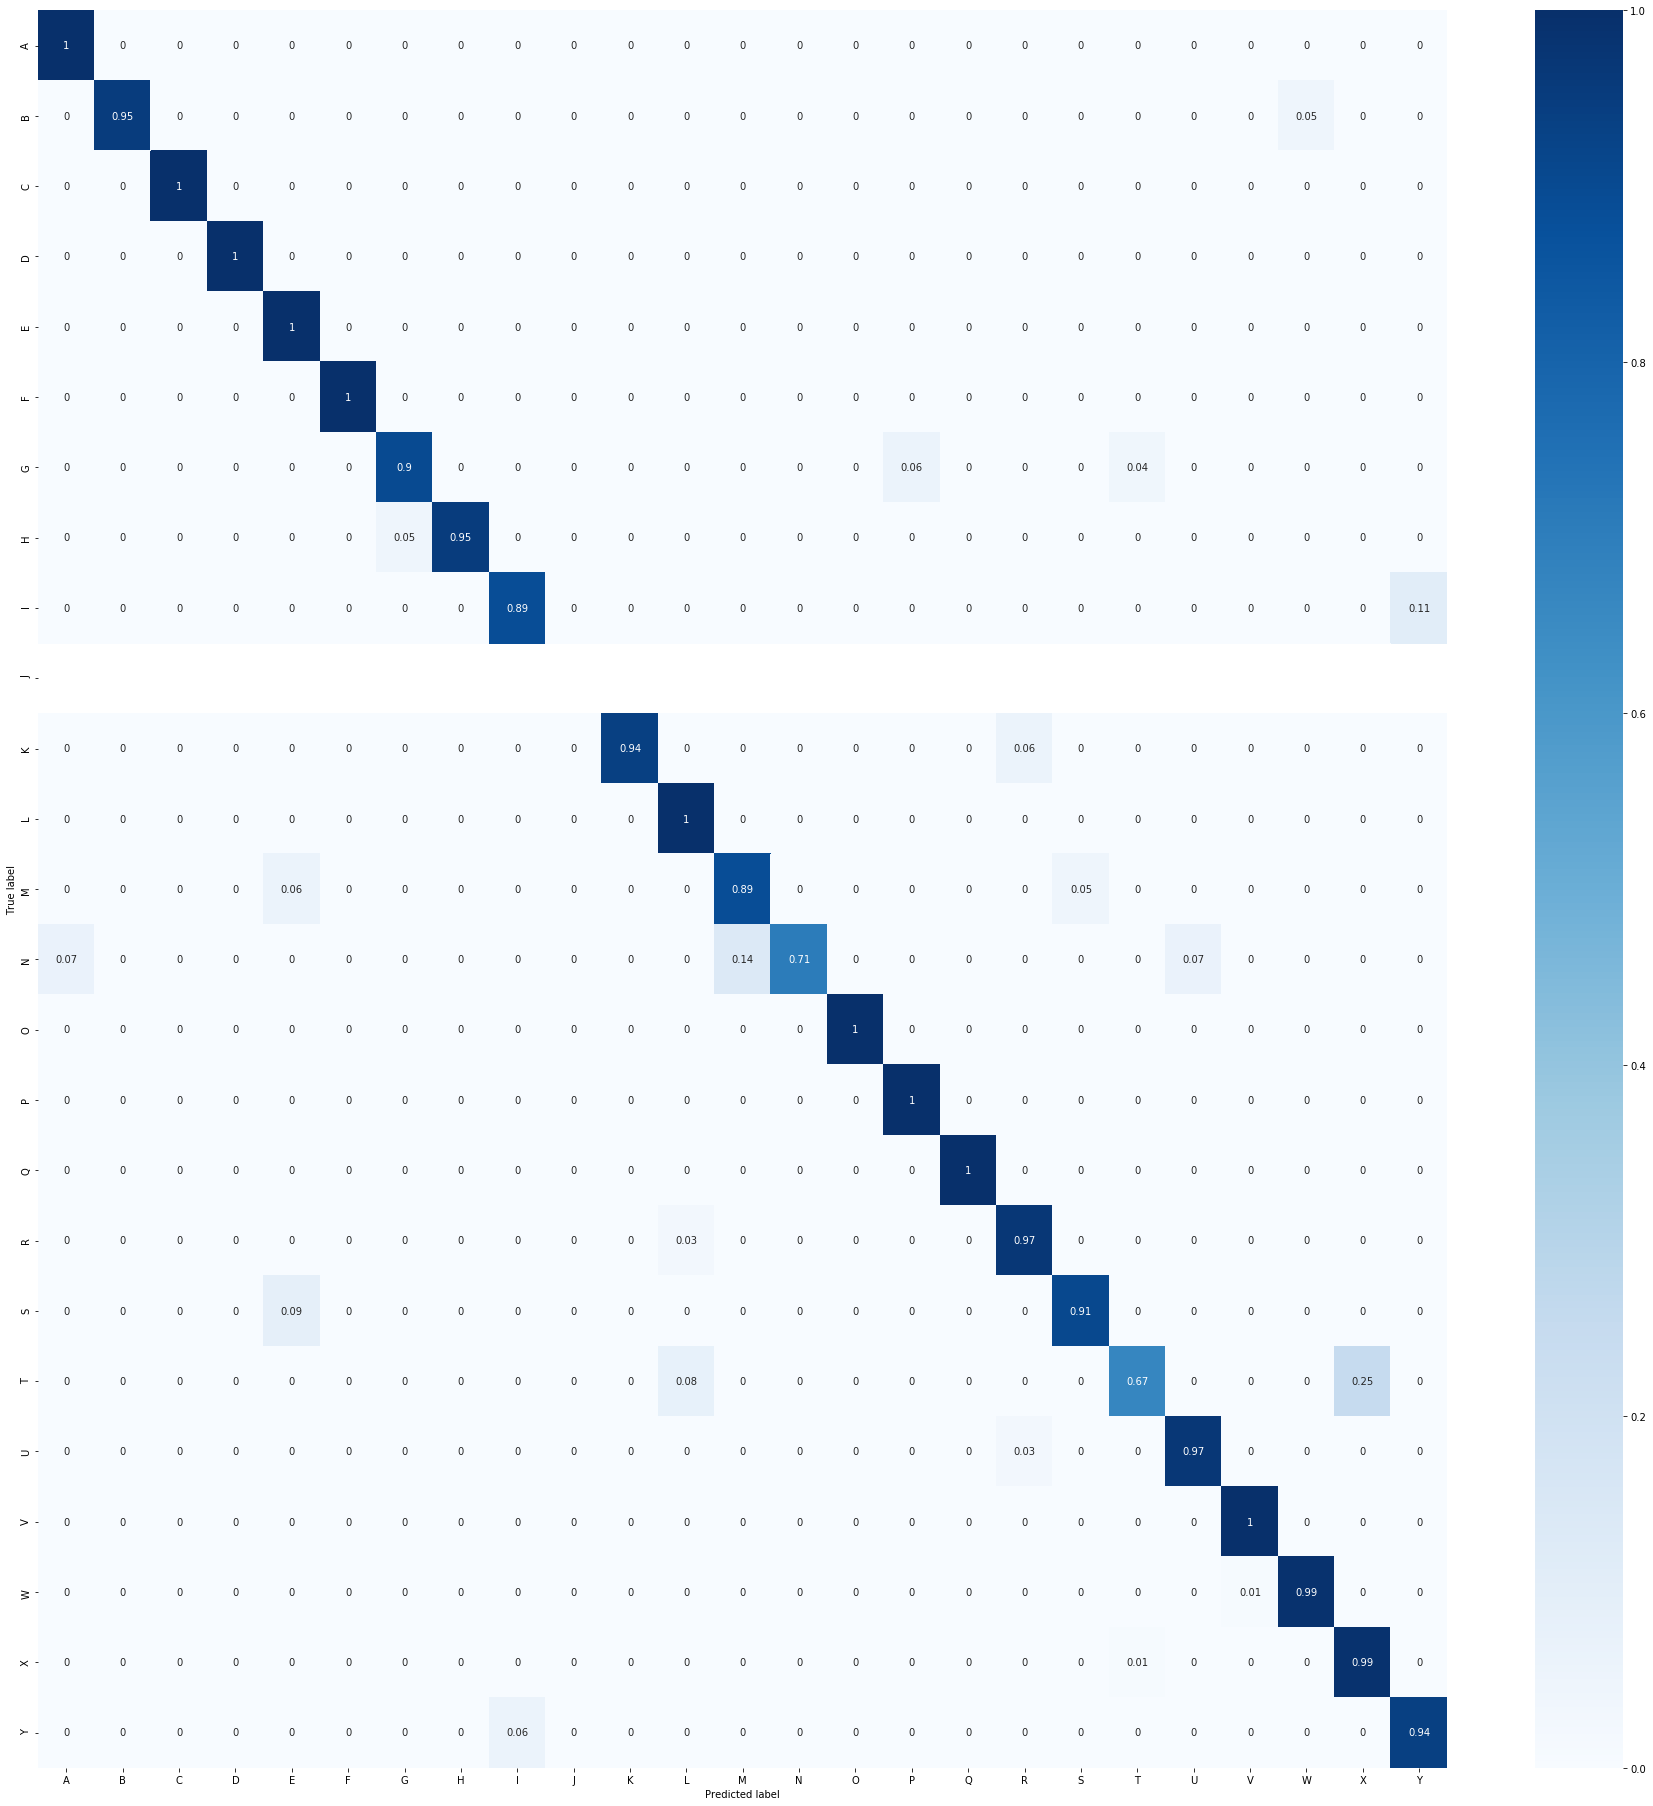

In [40]:
# Confusion matrix

y_pred=np.argmax(model.predict(x_test),axis =-1)
con_mat = tf.math.confusion_matrix(labels=y_test, predictions=y_pred).numpy()

con_mat_norm = np.around(con_mat.astype('float') / con_mat.sum(axis=1)[:, np.newaxis], decimals=2)

con_mat_df = pd.DataFrame(con_mat_norm,
                     index = list("ABCDEFGHIJKLMNOPQRSTUVWXY"), 
                     columns = list("ABCDEFGHIJKLMNOPQRSTUVWXY"))

figure = plt.figure(figsize=(25, 25))
sns.heatmap(con_mat_df, annot=True,cmap=plt.cm.Blues)
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

## Objective 3 _(if present)_
### Explanation of Results

The third objective was to test the CNNS model ability to identify sign language letters of the alphabet based on images we had taken on our phones.

In order to do so, our images had to be prepared into a format that would be compatible with our model – the same dimensions and colour scheme the model was trained on.
The files labelled a-z (not including j and z) were made. Then each image taken by a member of the group was placed in the corresponding folder.
  
The os library were then used to pull each image from its directory from which the cv2 library was used to form an image array in grey scale. The image array was then normalized by dividing the array by the scalar 250 as this was the largest value of any pixel of the images taken on our phones by the group. Normalization was necessary as the model was trained on normalized data ranging from 0 to 1.

The image arrays were then initially re sized into a 28 by 28 pixel array using the cv2 library and appended to in matrix alongside their corresponding label as a value (e.g 2 = b, 3=c). The input matrixes were then put into a list labelled X and the label into a list labelled y where each image array was indexed in X to the same index in y, I.E x[2]’s label would be y[2].
The image arrays in X were then re-sized to (-1, 28, 28, 1) matrix as this was the required dimensions for the array to be tested properly on the CNN model and assigned a letter to their corresponding label e.g X[0] was the matrix for the letter A therefore it was assigned the variable A.
Each letter was then tested against the model. The first letter being what the expected outcome was and the latte being what the model identified.
 
The model identified some letters but failed for many most likely due to the model being trained on images that were all quite similar which would make it hard for the model to generalize to new examples.


### Visualisation
The following codes shows the vizulation shows one of our own images after being grey scaled and normalized

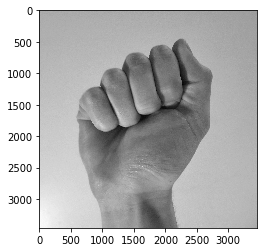

In [41]:
for category in CATGORIES:
    path=os.path.join(DATAIR,category)
    for img in os.listdir(path):
        img_array=cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
        img_array=img_array/250
        plt.imshow(img_array, cmap="gray")
        plt.show()
        break
    break
    

# Conclusion 


### Acheivements
We successfully carried out the pre-processing of the data so that it could be inputted into the convolutional neural network. The convolutional neural network created was able to return the correct letter using the MNIST training and testing data however unfortunately when our own images were inputted the success rate of outputting the correct letter was reduced. The output letters were connected correctly. 

### Limitations

The main limitation of the data was the lighting the images were taken in. The direction of light and therefore the placement of shadows in the input image data testing and training set was almost identical. This caused the CNN to recognise a smaller range of images. Although data augmentation increased the variety of the images, the data set used the same hand in all images meaning the size and skin tone were not varied enough to be inclusive of everyone using the model.

### Future Work

Future work: In the future, we would add a spellchecker to the model and perhaps an autocorrect option would also be beneficial; users would not need to use an additional program to proofread their work. Had time allowed we would have trained the data set with a larger volume of varied data to make the model more inclusive to skin colour and hand size. Ideally, development of this model will incorporate an algorithm capable of detecting motion instead of images so that J and Z could be included. Eventually this idea could be adapted to return words without having to connect letters with the user signing words and not individual letters.